<h1> EDA Baseline Notebook</h1>

*Leandro Destefani*

# 0.0 Imports

In [1]:
import requests
from pandas.io.json import json_normalize
import pandas as pd
import missingno as msno 
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy import stats
import time

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
pd.options.display.float_format = '{:.4f}'.format

In [2]:
# Load the datasets
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
print('Train set shape:', train.shape)
print('Test set shape:', test.shape)

Train set shape: (39446, 29)
Test set shape: (39446, 28)


## 0.2 Helper Functions

In [59]:
def jupyter_settings():
    %matplotlib inline
#     %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [15, 12]
    plt.rcParams['font.size'] = 24
#     display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
jupyter_settings() 

# 1.0 Data Reading

In [4]:
df = pd.read_csv('data/train.csv',)

## 1.1 Recognizing Dataset

In [5]:
df.columns

Index(['ID', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao', 'ano_modelo', 'odometro', 'cambio', 'num_portas', 'tipo', 'blindado', 'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor', 'tipo_anuncio', 'entrega_delivery', 'troca', 'elegivel_revisao', 'attr_veiculo_aceita_troca', 'attr_veiculo_único_dono', 'attr_veiculo_todas_as_revisões_feitas_pela_concessionária', 'attr_veiculo_ipva_pago', 'attr_veiculo_licenciado', 'attr_veiculo_garantia_de_fábrica', 'attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro', 'attr_veiculo_alienado', 'preco'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39446 entries, 0 to 39445
Data columns (total 29 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   ID                                                          39446 non-null  object 
 1   num_fotos                                                   39209 non-null  float64
 2   marca                                                       39446 non-null  object 
 3   modelo                                                      39446 non-null  object 
 4   versao                                                      39446 non-null  object 
 5   ano_de_fabricacao                                           39446 non-null  int64  
 6   ano_modelo                                                  39446 non-null  float64
 7   odometro                                                    39446 non-null  float64
 

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_fotos,39209.0000,10.3238,3.4811,8.0000,8.0000,8.0000,14.0000,21.0000
ano_de_fabricacao,39446.0000,2016.7481,4.0848,1985.0000,2015.0000,2018.0000,2019.0000,2022.0000
ano_modelo,39446.0000,2017.8072,2.6753,1997.0000,2016.0000,2018.0000,2020.0000,2023.0000
odometro,39446.0000,58382.2434,32542.7931,100.0000,31235.2500,57244.5000,81925.7500,390065.0000
num_portas,39446.0000,3.9411,0.3372,2.0000,4.0000,4.0000,4.0000,4.0000
attr_veiculo_alienado,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
preco,39446.0000,133385.8743,82384.9719,7258.1599,76774.3217,114307.9706,163987.0043,1359812.8923


## 1.2 Checking Missing Values

In [12]:
miss_val = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissValCount'])
miss_val

# Add a new column to the DataFrame and fill it with the percentage of missing values
miss_val['Percent'] = miss_val['MissValCount'].apply(lambda x: '{:.2f}'.format(float(x)/df.shape[0]*100))
miss_val = miss_val[miss_val['MissValCount'] > 0]
miss_val

,MissValCount,Percent
attr_veiculo_alienado,39446,100.00
attr_veiculo_garantia_de_fábrica,33658,85.33
attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro,31543,79.97
attr_veiculo_todas_as_revisões_feitas_pela_concessionária,27207,68.97
attr_veiculo_único_dono,25548,64.77
attr_veiculo_licenciado,18196,46.13
attr_veiculo_ipva_pago,13223,33.52
attr_veiculo_aceita_troca,10216,25.90
num_fotos,237,0.60


## 1.3 Checking Unique Quantities

In [13]:
ids = ['ID']

for col_name in df.columns:
    if (df[col_name].dtypes == 'object') and col_name not in ids:
        unique_cat = len(df[col_name].unique())
        print(f"Feature '{col_name}' has {unique_cat} unique categories.")

Feature 'marca' has 41 unique categories.
Feature 'modelo' has 473 unique categories.
Feature 'versao' has 2058 unique categories.
Feature 'cambio' has 7 unique categories.
Feature 'tipo' has 8 unique categories.
Feature 'blindado' has 2 unique categories.
Feature 'cor' has 8 unique categories.
Feature 'tipo_vendedor' has 2 unique categories.
Feature 'cidade_vendedor' has 648 unique categories.
Feature 'estado_vendedor' has 25 unique categories.
Feature 'tipo_anuncio' has 4 unique categories.
Feature 'attr_veiculo_aceita_troca' has 2 unique categories.
Feature 'attr_veiculo_único_dono' has 2 unique categories.
Feature 'attr_veiculo_todas_as_revisões_feitas_pela_concessionária' has 2 unique categories.
Feature 'attr_veiculo_ipva_pago' has 2 unique categories.
Feature 'attr_veiculo_licenciado' has 2 unique categories.
Feature 'attr_veiculo_garantia_de_fábrica' has 2 unique categories.
Feature 'attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro' has 2 unique categories.


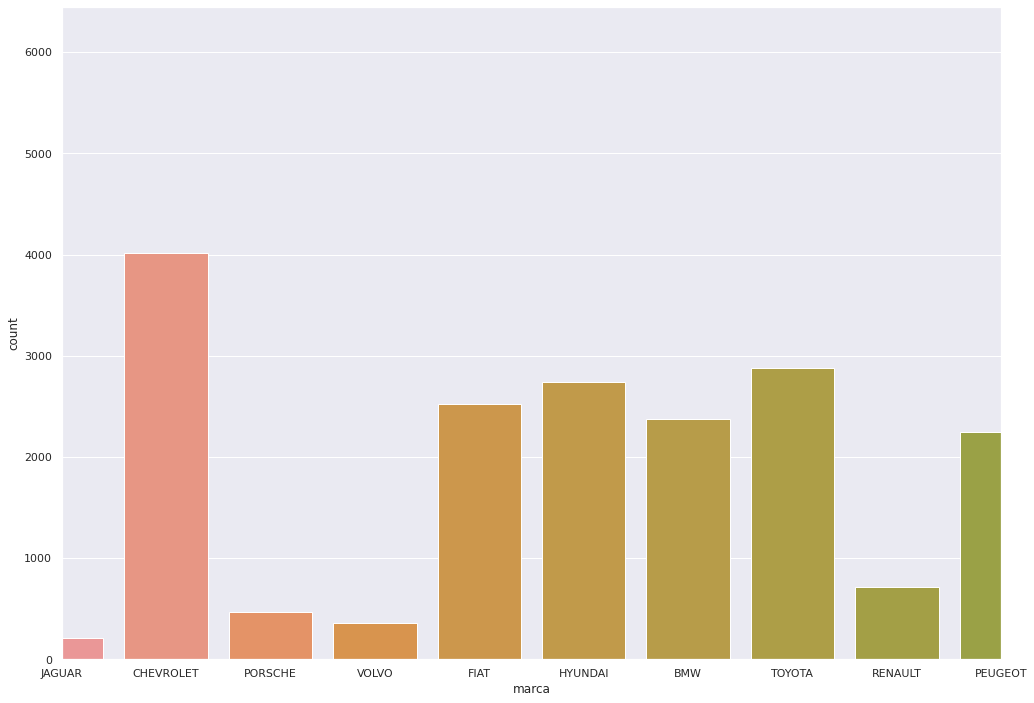

In [84]:
fig, ax = plt.subplots()
sns.countplot(x='marca', data=df, ax=ax)
ax.set_xlim(1,10) # showing first 10 brands
# ax.set_xticks(range(1, 5))
plt.show()

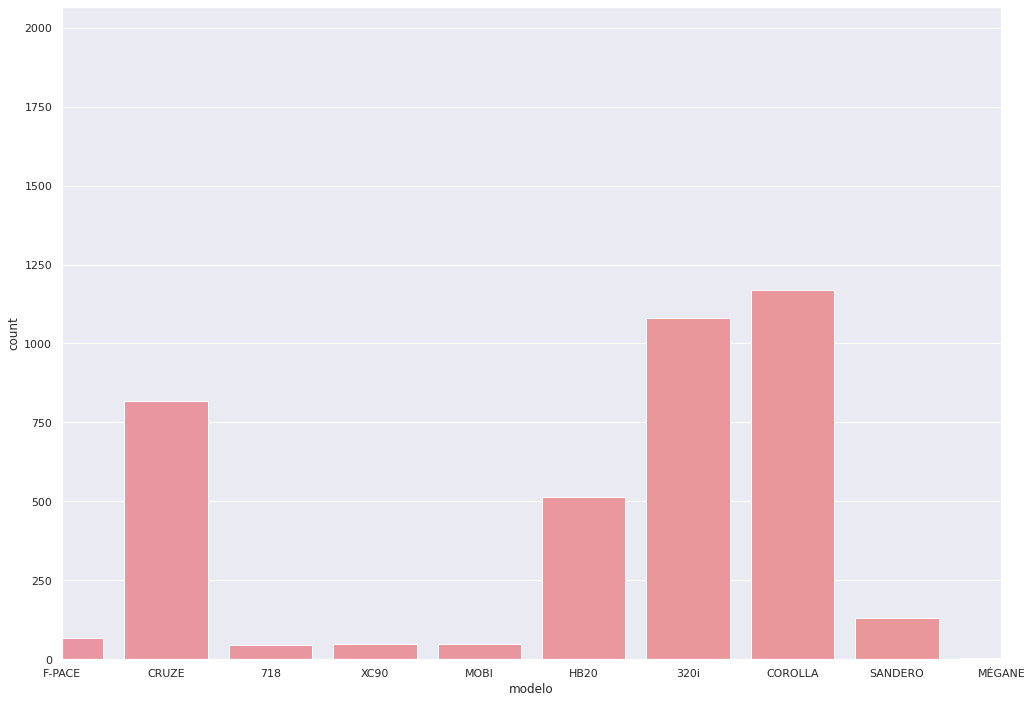

In [85]:
fig, ax = plt.subplots()
sns.countplot(x='modelo', data=df, ax=ax)
ax.set_xlim(1,10) # showing first 10 brands
# ax.set_xticks(range(1, 5))
plt.show()

In [ ]:
sns.set(font_scale=1.5)
sns.set_context("notebook")
#sns.set_color_codes("dark")
sns.set(style="ticks")
a4_dims = (14.00, 7.80)
x = dfall['rate.daily']
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.distplot(x, bins=400, 
             kde=True, 
             color='gray', 
             hist_kws={"alpha":None, "color":'steelblue'}
            )
plt.xlim(0, 405)
ax.set_ylabel('no. of vehicles in each price range', fontsize=14)
ax.set_xlabel('daily rate (dollars per day)', fontsize=14)
sns.despine(trim=True, left=True)
ax.xaxis.grid(True)

In [14]:
df['tipo'].value_counts()

Sedã                    21910
Hatchback                6570
Picape                   6426
Utilitário esportivo     4458
Perua/SW                   37
Cupê                       34
Minivan                    10
Conversível                 1
Name: tipo, dtype: int64

In [58]:
df['marca'].unique()

array(['VOLKSWAGEN', 'JAGUAR', 'CHEVROLET', 'PORSCHE', 'VOLVO', 'FIAT',
       'HYUNDAI', 'BMW', 'TOYOTA', 'RENAULT', 'PEUGEOT', 'JEEP', 'LEXUS',
       'MITSUBISHI', 'MERCEDES-BENZ', 'FORD', 'HONDA', 'AUDI', 'CITROËN',
       'MINI', 'NISSAN', 'LAND ROVER', 'RAM', 'KIA', 'TROLLER', 'SUBARU',
       'CHERY', 'SUZUKI', 'DODGE', 'BRM', 'CHRYSLER', 'LAMBORGHINI',
       'MASERATI', 'LIFAN', 'ALFA ROMEO', 'SMART', 'SSANGYONG', 'FERRARI',
       'JAC', 'EFFA', 'IVECO'], dtype=object)

In [59]:
df['versao'].unique()

array(['2.0 TRENDLINE 4X4 CD 16V TURBO INTERCOOLER DIESEL 4P AUTOMÁTICO',
       '2.0 16V TURBO DIESEL PRESTIGE AWD 4P AUTOMÁTICO',
       '1.8 LT 16V FLEX 4P AUTOMÁTICO', ...,
       '3.0 XL 4X4 CS TURBO ELECTRONIC DIESEL 2P MANUAL',
       '2.0 16V TWINPOWER GASOLINA S 4P STEPTRONIC',
       '1.0 EX 12V FLEX 4P MANUAL'], dtype=object)

In [64]:
df[['versao', 'cambio']].head(15)

,versao,cambio
0,2.0 TRENDLINE 4X4 CD 16V TURBO INTERCOOLER DIE...,Automática
1,2.0 16V TURBO DIESEL PRESTIGE AWD 4P AUTOMÁTICO,Automática
2,1.8 LT 16V FLEX 4P AUTOMÁTICO,Automática
3,2.0 16V H4 GASOLINA BOXSTER PDK,Automática
4,2.0 INSCRIPTION TURBO GASOLINA 4P 4X4 AUTOMÁTICO,Automática
5,1.0 EVO FLEX LIKE. MANUAL,Manual
6,1.6 PREMIUM 16V FLEX 4P AUTOMÁTICO,Automática
7,2.0 SPORT 16V TURBO ACTIVE FLEX 4P AUTOMÁTICO,Automática
8,1.8 VVT-I HYBRID FLEX ALTIS CVT,Automática
9,2.0 XEI 16V FLEX 4P AUTOMÁTICO,Automática


In [71]:
df['versao'].str[:3].unique()

array(['2.0', '1.8', '1.0', '1.6', '1.4', '1.3', '3.2', '1.5', '2.2',
       '3.3', '2.8', '3.0', '2.7', '5.0', '6.7', '4.6', '2.3', '2.5',
       '2.4', '6.2', '2.9', 'B12', '4.4', '3.6', '3.5', '4.0', '2.1',
       '3.8', '1.2', '4.8', '3.9', '4.7', '4.2', '4.3', '5.5', '5.2',
       '1.7', '4S ', 'EV ', '4.5', '4.1', '3.7', '5.7', '0.6', 'BEV',
       '90 ', '1.1', 'ELÉ', '5.9', '4.9', 'TUR', 'Z.E', '6.3', '1.9',
       'P8 '], dtype=object)

In [72]:
df[df['versao'].str[:3] == 'TUR'].head()

,ID,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,odometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,tipo_anuncio,entrega_delivery,troca,elegivel_revisao,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro,attr_veiculo_alienado,preco
14616,149925136119651406615682489475272602026,20.0,PORSCHE,TAYCAN,TURBO ELÉTRICO,2020,2020.0,35540.0,Automática,4,Sedã,N,Branco,PJ,Itajubá,Minas Gerais (MG),Loja,True,True,False,Aceita troca,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,280272.689984
28986,221829475100870056989666452805921573731,21.0,PORSCHE,TAYCAN,TURBO ELÉTRICO,2020,2021.0,16330.0,Automática,4,Sedã,N,Cinza,PJ,Medianeira,Paraná (PR),Loja,True,True,False,Aceita troca,Único dono,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,NaN,NaN,343686.483480


In [73]:
df[df['versao'].str[:3] == 'BEV'].head()

,ID,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,odometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,tipo_anuncio,entrega_delivery,troca,elegivel_revisao,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro,attr_veiculo_alienado,preco
7803,127375411443317499341266307060724378300,8.0,BMW,i3,BEV 8V ELÉTRICO 4P AUTOMÁTICO,2014,2015.0,63219.0,Automática,4,Hatchback,N,Preto,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,NaN,NaN,Todas as revisões feitas pela agenda do carro,NaN,104877.640815
17278,79980662097047292884129685984330677334,8.0,BMW,i3,BEV 8V ELÉTRICO 4P AUTOMÁTICO,2014,2015.0,29813.0,Automática,4,Hatchback,N,Preto,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,Todas as revisões feitas pela agenda do carro,NaN,170214.752814


In [76]:
df[df['versao'].str[:3] == 'ELÉ'].head(10)

,ID,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,odometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,tipo_anuncio,entrega_delivery,troca,elegivel_revisao,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro,attr_veiculo_alienado,preco
10373,196042682123856742567037161235202591920,17.0,AUDI,E-TRON,ELÉTRICO SPORTBACK PERFORMANCE BLACK QUATTRO,2020,2021.0,26082.0,Automática,4,Utilitário esportivo,N,Cinza,PJ,Unaí,Minas Gerais (MG),Loja,False,False,False,Aceita troca,Único dono,NaN,NaN,NaN,NaN,NaN,NaN,227635.772921
14818,49319811389287113749750913896668418429,8.0,BMW,i3,ELÉTRICO eDRIVE BEV AUTOMÁTICO,2021,2021.0,12294.0,Automática,4,Picape,N,Branco,PF,Serrana,Rio de Janeiro (RJ),Pessoa Física,False,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,245163.893311
15445,130610698336474038774146719521621430115,8.0,BMW,i3,ELÉTRICO eDRIVE BEV FULL AUTOMÁTICO,2021,2021.0,11937.0,Automática,4,Picape,N,Cinza,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,292430.257144
16732,73087837484870479563810926070157006466,17.0,PORSCHE,TAYCAN,ELÉTRICO,2021,2021.0,17951.0,Automática,4,Sedã,N,Branco,PJ,Goiânia,Minas Gerais (MG),Loja,False,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,321302.122880
23889,45108748100737535927868807477412102970,16.0,AUDI,E-TRON,ELÉTRICO PERFORMANCE QUATTRO,2021,2021.0,11179.0,Automática,4,Utilitário esportivo,N,Preto,PJ,São Paulo,São Paulo (SP),Loja,False,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,268781.697168
27893,35976306917185584943381515497133510294,8.0,BMW,i3,ELÉTRICO eDRIVE BEV AUTOMÁTICO,2019,2020.0,33047.0,Automática,4,Picape,N,Branco,PF,Rio de Janeiro,Rio de Janeiro (RJ),Pessoa Física,False,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,179540.022717
28980,324488731727798327368807353277984338147,13.0,AUDI,E-TRON,ELÉTRICO SPORTBACK PERFORMANCE QUATTRO,2021,2021.0,23625.0,Automática,4,Utilitário esportivo,N,Cinza,PJ,Medianeira,Paraná (PR),Loja,False,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296591.237987
33842,123314496607816968542483044770325065053,8.0,PORSCHE,TAYCAN,ELÉTRICO,2020,2021.0,17961.0,Automática,4,Sedã,N,Branco,PF,Medianeira,Paraná (PR),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,386852.722707
36439,163772791891405425888446020526264528985,16.0,AUDI,E-TRON,ELÉTRICO SPORTBACK PERFORMANCE BLACK QUATTRO,2020,2021.0,21586.0,Automática,4,Utilitário esportivo,N,Branco,PJ,Blumenau,Santa Catarina (SC),Concessionária,True,True,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193756.608468
38316,264591803063259771117343086524619371868,16.0,PORSCHE,TAYCAN,ELÉTRICO,2020,2021.0,17918.0,Automática,4,Sedã,N,Cinza,PJ,Medianeira,Paraná (PR),Loja,False,False,False,Aceita troca,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,313651.762417


In [82]:
b12 = df[df['versao'].str[:3] == 'B12'].head()
b12['versao'].unique()

array(['B12P 40 ELÉTRICO'], dtype=object)

In [85]:
df[df['versao'].str[:3] == '4S '].head()

,ID,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,odometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,tipo_anuncio,entrega_delivery,troca,elegivel_revisao,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro,attr_veiculo_alienado,preco
2317,282188904946445945592240575631920582358,8.0,PORSCHE,TAYCAN,4S ELÉTRICO,2020,2021.0,1863.0,Automática,4,Sedã,N,Preto,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,338091.798955
5210,172363484321237317475618438668820040053,8.0,PORSCHE,TAYCAN,4S ELÉTRICO,2021,2021.0,1992.0,Automática,4,Sedã,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,NaN,NaN,Garantia de fábrica,NaN,NaN,321081.661682
12094,287385824842630564514808959597252788857,15.0,PORSCHE,TAYCAN,4S ELÉTRICO,2021,2021.0,2792.0,Automática,4,Sedã,N,Cinza,PJ,Rio de Janeiro,Rio de Janeiro (RJ),Loja,True,True,False,Aceita troca,Único dono,Todas as revisões feitas pela concessionária,NaN,Licenciado,Garantia de fábrica,NaN,NaN,334412.741105
12388,42992156621294716966574339272539136025,13.0,PORSCHE,TAYCAN,4S ELÉTRICO,2021,2021.0,1751.0,Automática,4,Picape,N,Branco,PJ,Recife,Minas Gerais (MG),Concessionária,False,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,334189.873889
15260,76224965282349669729231782800180070174,16.0,PORSCHE,TAYCAN,4S ELÉTRICO,2020,2021.0,33290.0,Automática,4,Utilitário esportivo,N,Branco,PJ,Curitiba,Paraná (PR),Loja,True,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,381097.186200


In [88]:
df[df['versao'].str[:3] == 'EV '].head(6)

,ID,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,odometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,tipo_anuncio,entrega_delivery,troca,elegivel_revisao,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro,attr_veiculo_alienado,preco
2937,94089846439325118700825290312097791407,8.0,CHEVROLET,BOLT,EV 60 ELÉTRICO,2020,2021.0,24069.0,Automática,4,Utilitário esportivo,N,Cinza,PF,Tupã,São Paulo (SP),Pessoa Física,False,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,255152.443907
5264,284865173056606832473420830976378845002,8.0,CHEVROLET,BOLT,EV 60 ELÉTRICO,2020,2020.0,24548.0,Automática,4,Sedã,N,Cinza,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,283185.766093
17759,65707123074039626784183680046932299900,8.0,CHEVROLET,BOLT,EV 60 ELÉTRICO,2019,2020.0,14711.0,Automática,4,Sedã,N,Cinza,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,273713.461203
18457,146881700073465482590836699094981299365,8.0,CHEVROLET,BOLT,EV 60 ELÉTRICO,2019,2019.0,43852.0,Automática,4,Sedã,N,Cinza,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,236703.865052
25718,323862027901800773944097290963015757420,8.0,CHEVROLET,BOLT,EV 60 ELÉTRICO,2020,2021.0,27554.0,Automática,4,Picape,N,Cinza,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,183734.013350
29890,303825974833510864431798193864908660791,8.0,CHEVROLET,BOLT,EV 60 ELÉTRICO,2019,2020.0,10540.0,Automática,4,Sedã,N,Cinza,PF,Guaçuí,Santa Catarina (SC),Pessoa Física,False,False,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,145169.406631


In [91]:
df[df['versao'].str[:3] == 'Z.E'].head(6)

,ID,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,odometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,tipo_anuncio,entrega_delivery,troca,elegivel_revisao,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro,attr_veiculo_alienado,preco
19290,126868065787629592054193790735367859138,8.0,RENAULT,ZOE,Z.E. 40 ELÉTRICO,2019,2019.0,25941.0,Automática,4,Hatchback,N,Branco,PF,Belo Horizonte,Paraná (PR),Pessoa Física,False,False,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,NaN,NaN,109126.420820
24125,228749444366886922522237443118113908947,15.0,RENAULT,ZOE,Z.E. 40 ELÉTRICO,2019,2020.0,44205.0,Automática,4,Picape,N,Branco,PJ,São Paulo,São Paulo (SP),Loja,True,True,False,Aceita troca,Único dono,NaN,NaN,NaN,NaN,NaN,NaN,150923.239471
36489,289912437211449865120839446130005191841,20.0,RENAULT,ZOE,Z.E. 40 ELÉTRICO,2019,2019.0,55490.0,Automática,4,Sedã,N,Branco,PJ,São Paulo,São Paulo (SP),Loja,True,True,False,Aceita troca,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,218163.391601


In [92]:
df[df['versao'].str[:3] == 'P8 '].head(6)

,ID,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,odometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,tipo_anuncio,entrega_delivery,troca,elegivel_revisao,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro,attr_veiculo_alienado,preco
33347,41802501886300682558571456793009368840,15.0,VOLVO,XC40,P8 RECHARGE ELECTRIC BEV PURE AWD,2021,2022.0,15481.0,Automática,4,Utilitário esportivo,N,Cinza,PJ,Recife,Santa Catarina (SC),Concessionária,False,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290341.398044


## 1.4 Checking Numerical and Categorical

In [23]:
numerical = [col for col in train.select_dtypes(include=['number'])]
categorical = [col for col in train.select_dtypes(exclude=['number'])]

In [130]:
print(f'Temos {len(numerical)} colunas numéricas')
print(f'Temos {len(categorical)} colunas categóricas.')

Temos 7 colunas numéricas
Temos 22 colunas categóricas.


# 2.0 EDA

<Figure size 1080x720 with 0 Axes>

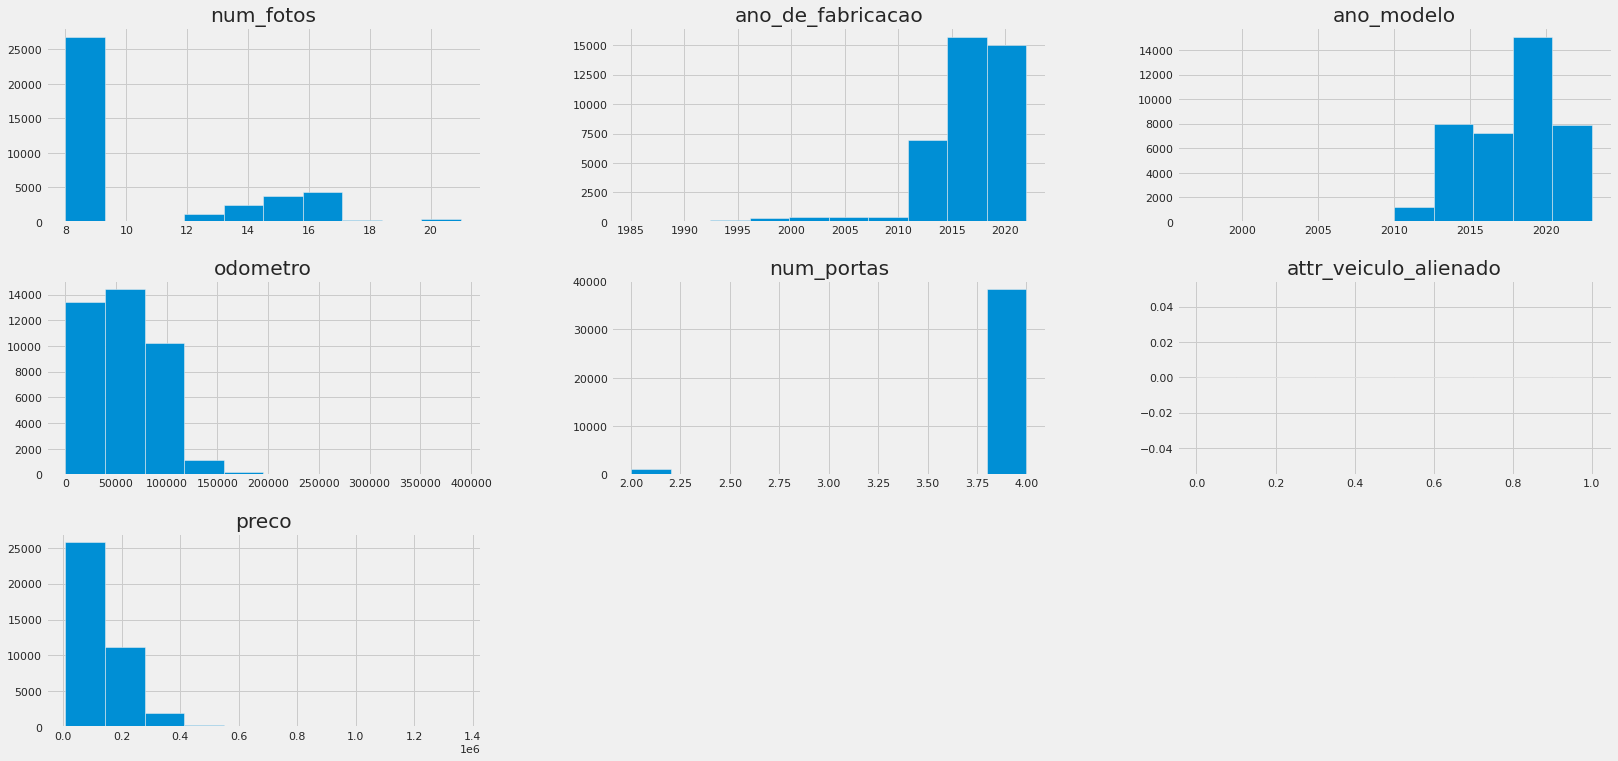

In [39]:
plt.figure(figsize=(15,10))
df[numerical].hist();
plt.show();

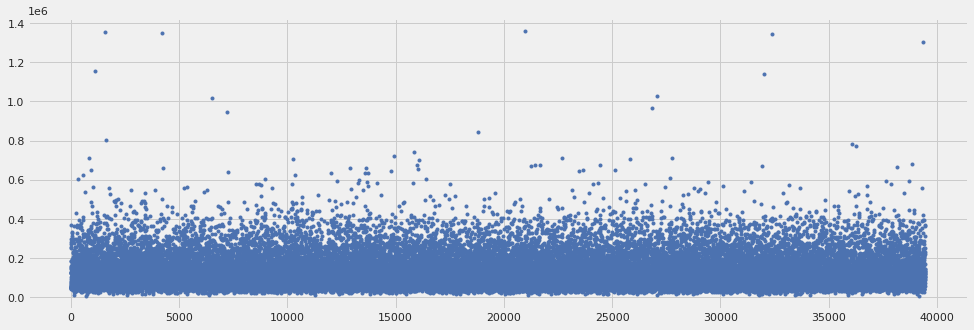

In [40]:
TARGET = 'preco'
df[TARGET].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
#         title=''
               ) # titulo do grafico de time series
plt.show()

In [103]:
df[df[TARGET] > 1000000]

,ID,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,odometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,tipo_anuncio,entrega_delivery,troca,elegivel_revisao,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro,attr_veiculo_alienado,preco
1123,80859761199167937486296054000762167416,8.0,RAM,2500,6.7 I6 TURBO DIESEL LARAMIE CD 4X4 AUTOMÁTICO,2019,2020.0,10993.0,Automática,4,Picape,N,Preto,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.154360e+06
1594,91500904288326976442414846457496102931,8.0,LAMBORGHINI,HURACÁN,5.2 V10 GASOLINA LP 580-2 LDF,2014,2014.0,2230.0,Automática,4,Cupê,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,1.352089e+06
4204,43158431735708352041169148103055117190,17.0,LAND ROVER,RANGE ROVER VELAR,3.0 V6 P380 GASOLINA R-DYNAMIC HSE AUTOMÁTICO,2018,2019.0,6199.0,Automática,4,Utilitário esportivo,N,Branco,PJ,Goiânia,Goiás (GO),Loja,False,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.349748e+06
6512,275643332887802136087805956047136410022,15.0,BMW,M2,3.0 24V I6 GASOLINA COMPETITION COUPÉ M DCT,2019,2019.0,13875.0,Automática,4,Cupê,N,Preto,PJ,São Paulo,São Paulo (SP),Loja,True,True,False,Aceita troca,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,1.019841e+06
20969,308503071796180546584015995459795952963,13.0,PORSCHE,911,3.0 24V H6 GASOLINA TARGA 4S PDK,2014,2017.0,10249.0,Automática,2,Picape,N,Branco,PJ,Cocalzinho de Goiás,Santa Catarina (SC),Loja,True,True,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.359813e+06
27078,155547567848928485806288559744566635721,17.0,PORSCHE,718,2.0 16V H4 GASOLINA CAYMAN PDK,2015,2015.0,12667.0,Automática,4,Picape,N,Branco,PF,Sorocaba,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.028431e+06
32004,128068977712443763554635933612117555753,15.0,PORSCHE,911,3.0 24V H6 GASOLINA TARGA 4 GTS PDK,2019,2019.0,10058.0,Manual,2,Picape,N,Branco,PJ,São Paulo,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,NaN,NaN,1.140113e+06
32390,103493161159764585732665754840916441251,16.0,PORSCHE,911,3.0 24V H6 GASOLINA TARGA 4 GTS PDK,2018,2018.0,10529.0,Manual,4,Cupê,N,Branco,PJ,Sorocaba,São Paulo (SP),Loja,True,True,False,Aceita troca,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,1.346823e+06
39377,109562692197534372832005015799827294039,8.0,PORSCHE,PANAMERA,2.9 V6 E-HYBRID 4 PDK,2018,2019.0,7836.0,Automática,4,Sedã,N,Cinza,PF,Santana de Parnaíba,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,1.305782e+06


In [117]:
df[['marca', 'preco']].groupby('marca').mean().sort_values(by='preco', ascending=False)

,preco
marca,
LAMBORGHINI,1352089.1299
RAM,324234.4415
PORSCHE,316500.6446
JAGUAR,223453.2455
LAND ROVER,220891.1579
MASERATI,207159.3819
BMW,200118.5732
VOLVO,197789.3625
LEXUS,183506.9687


In [122]:
df[df['marca'] == 'PORSCHE'].shape

(470, 29)

In [126]:
# corr = train.corr()
# mask = np.triu(np.ones_like(corr, dtype=bool))
# f, ax = plt.subplots(figsize=(12, 12), facecolor='#EAECEE')
# cmap = sns.color_palette("rainbow", as_cmap=True)
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1., center=0, annot=False,
#             square=True, linewidths=.5, cbar_kws={"shrink": 0.75})

# ax.set_title('Correlation heatmap', fontsize=24, y= 1.05)
# colorbar = ax.collections[0].colorbar

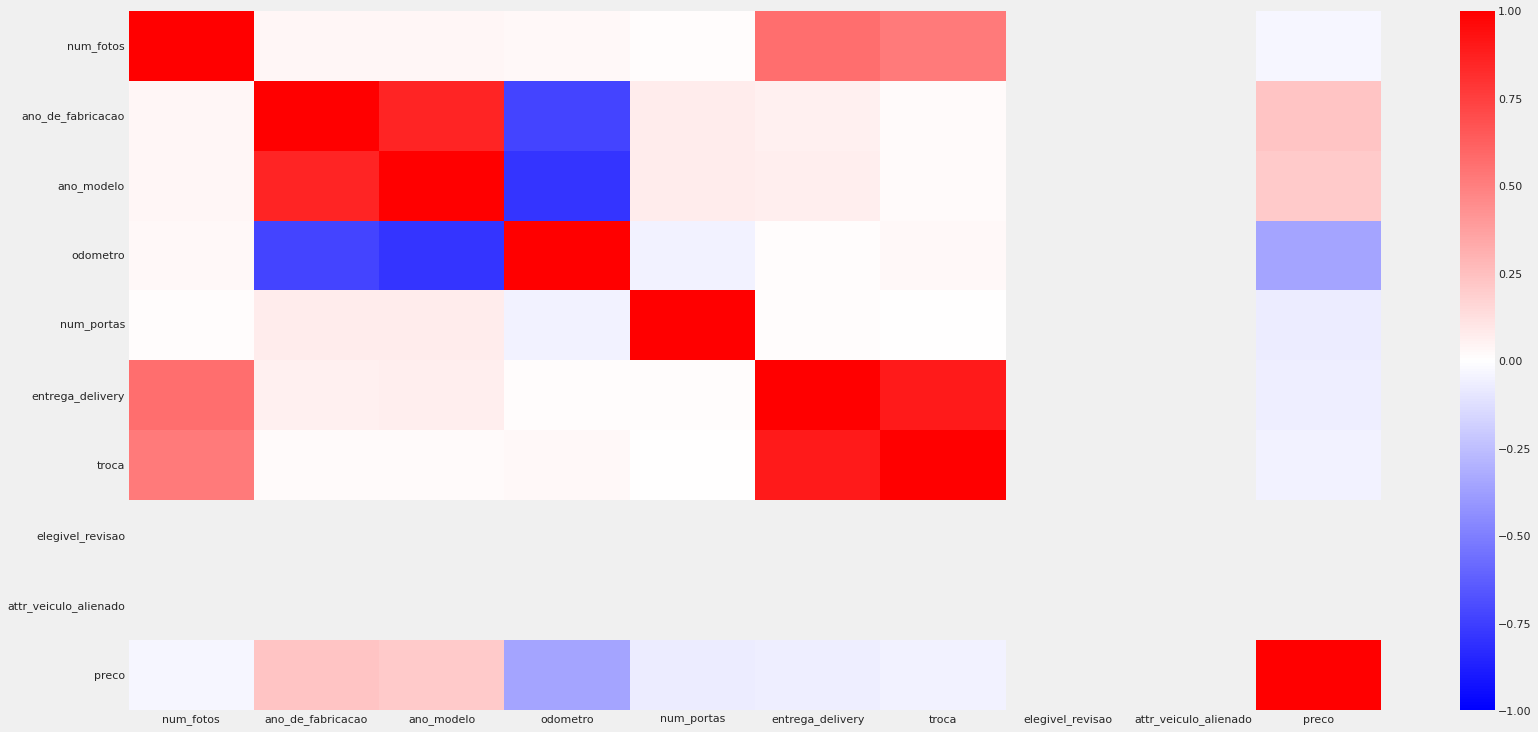

In [124]:
sns.heatmap(train.corr(), cmap='bwr', vmin=-1, vmax=1);